In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

In [2]:
# CCAT-Prime
zmin = 3.5
zmax = 8.1
Pei = 2.3e4 #Mpc^3 kJy^2 /sr^2 

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

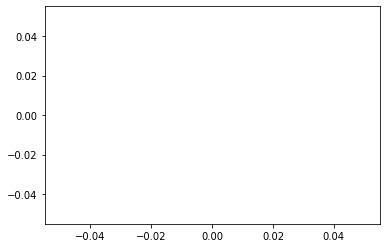

In [3]:
plt.plot()
plt.rcParams.update({
    "text.usetex": True,
    "font.size": "11",
    "font.family" : "serif"
})

In [4]:
import matplotlib.gridspec as gridspec


In [5]:
plot_Lambdas = np.arange(25)[::6]
log_ymin = np.log10(ells[0])
log_ymax = np.log10(ells[-1])

In [6]:
nbins = 100

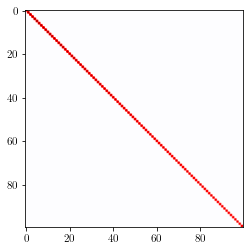

In [7]:
Lambda_idx = 0
oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, nbins)
cov = Pei * np.load(oup_fname)
vb = np.max(np.abs(cov))
plt.imshow(cov, vmin = -vb, vmax = vb, cmap='seismic')

In [8]:
from matplotlib import colors
lin_factor = 2e1
linthresh = vb/lin_factor
norm = colors.SymLogNorm(linthresh=linthresh, 
                         vmin=-vb, 
                         vmax=vb, 
                         base=10)


In [9]:
log2 = 12
continous_covs ={}

In [10]:
for Lambda_idx in [0,6,12,18,24]:
    Lambda = Lambdas[Lambda_idx]
    mpm_oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_%.5f_zmax_%.5f_Lambda_%.5e_log2_%d.npy'%(zmin, zmax, Lambda, log2)
    print(mpm_oup_fname)
    with open(mpm_oup_fname, 'rb') as f:
        results = pickle.load(f)

        shape = (2**log2, 2**log2)
        mpm_eIeI = np.zeros(shape, dtype=np.complex128)
        mpm_eLOeLO = np.zeros(shape, dtype=np.complex128)
        mpm_cross = np.zeros(shape, dtype=np.complex128)

        for i, j, _eIeI, _cross, _eLOeLO in tqdm(results):
            mpm_eIeI[i,j] = _eIeI
            mpm_eLOeLO[i,j] = mpm_eLOeLO[j,i] = _eLOeLO
            mpm_cross[i,j] = mpm_cross[j,i] = _cross

        mpm_eHIeHI = mpm_eIeI + mpm_eLOeLO - mpm_cross
        mpm_eHIeHI = np.real(mpm_eHIeHI)
        continous_covs[Lambda_idx] = mpm_eHIeHI

/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_1.00000e-05_log2_12.npy


100%|██████████| 8390656/8390656 [01:12<00:00, 115467.41it/s]


/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_1.00000e-04_log2_12.npy


100%|██████████| 8390656/8390656 [01:14<00:00, 112662.31it/s]


/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_1.00000e-03_log2_12.npy


100%|██████████| 8390656/8390656 [01:15<00:00, 110774.48it/s]


/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_1.00000e-02_log2_12.npy


100%|██████████| 8390656/8390656 [01:16<00:00, 110206.76it/s]


/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_zmin_3.50000_zmax_8.10000_Lambda_1.00000e-01_log2_12.npy


100%|██████████| 8390656/8390656 [01:17<00:00, 108611.82it/s]


In [11]:
import matplotlib.patheffects as pe

In [12]:
plt_left = plt.rcParams['figure.subplot.left']
plt_right = plt.rcParams['figure.subplot.right']
plt_cntr = (plt_left + plt_right) / 2


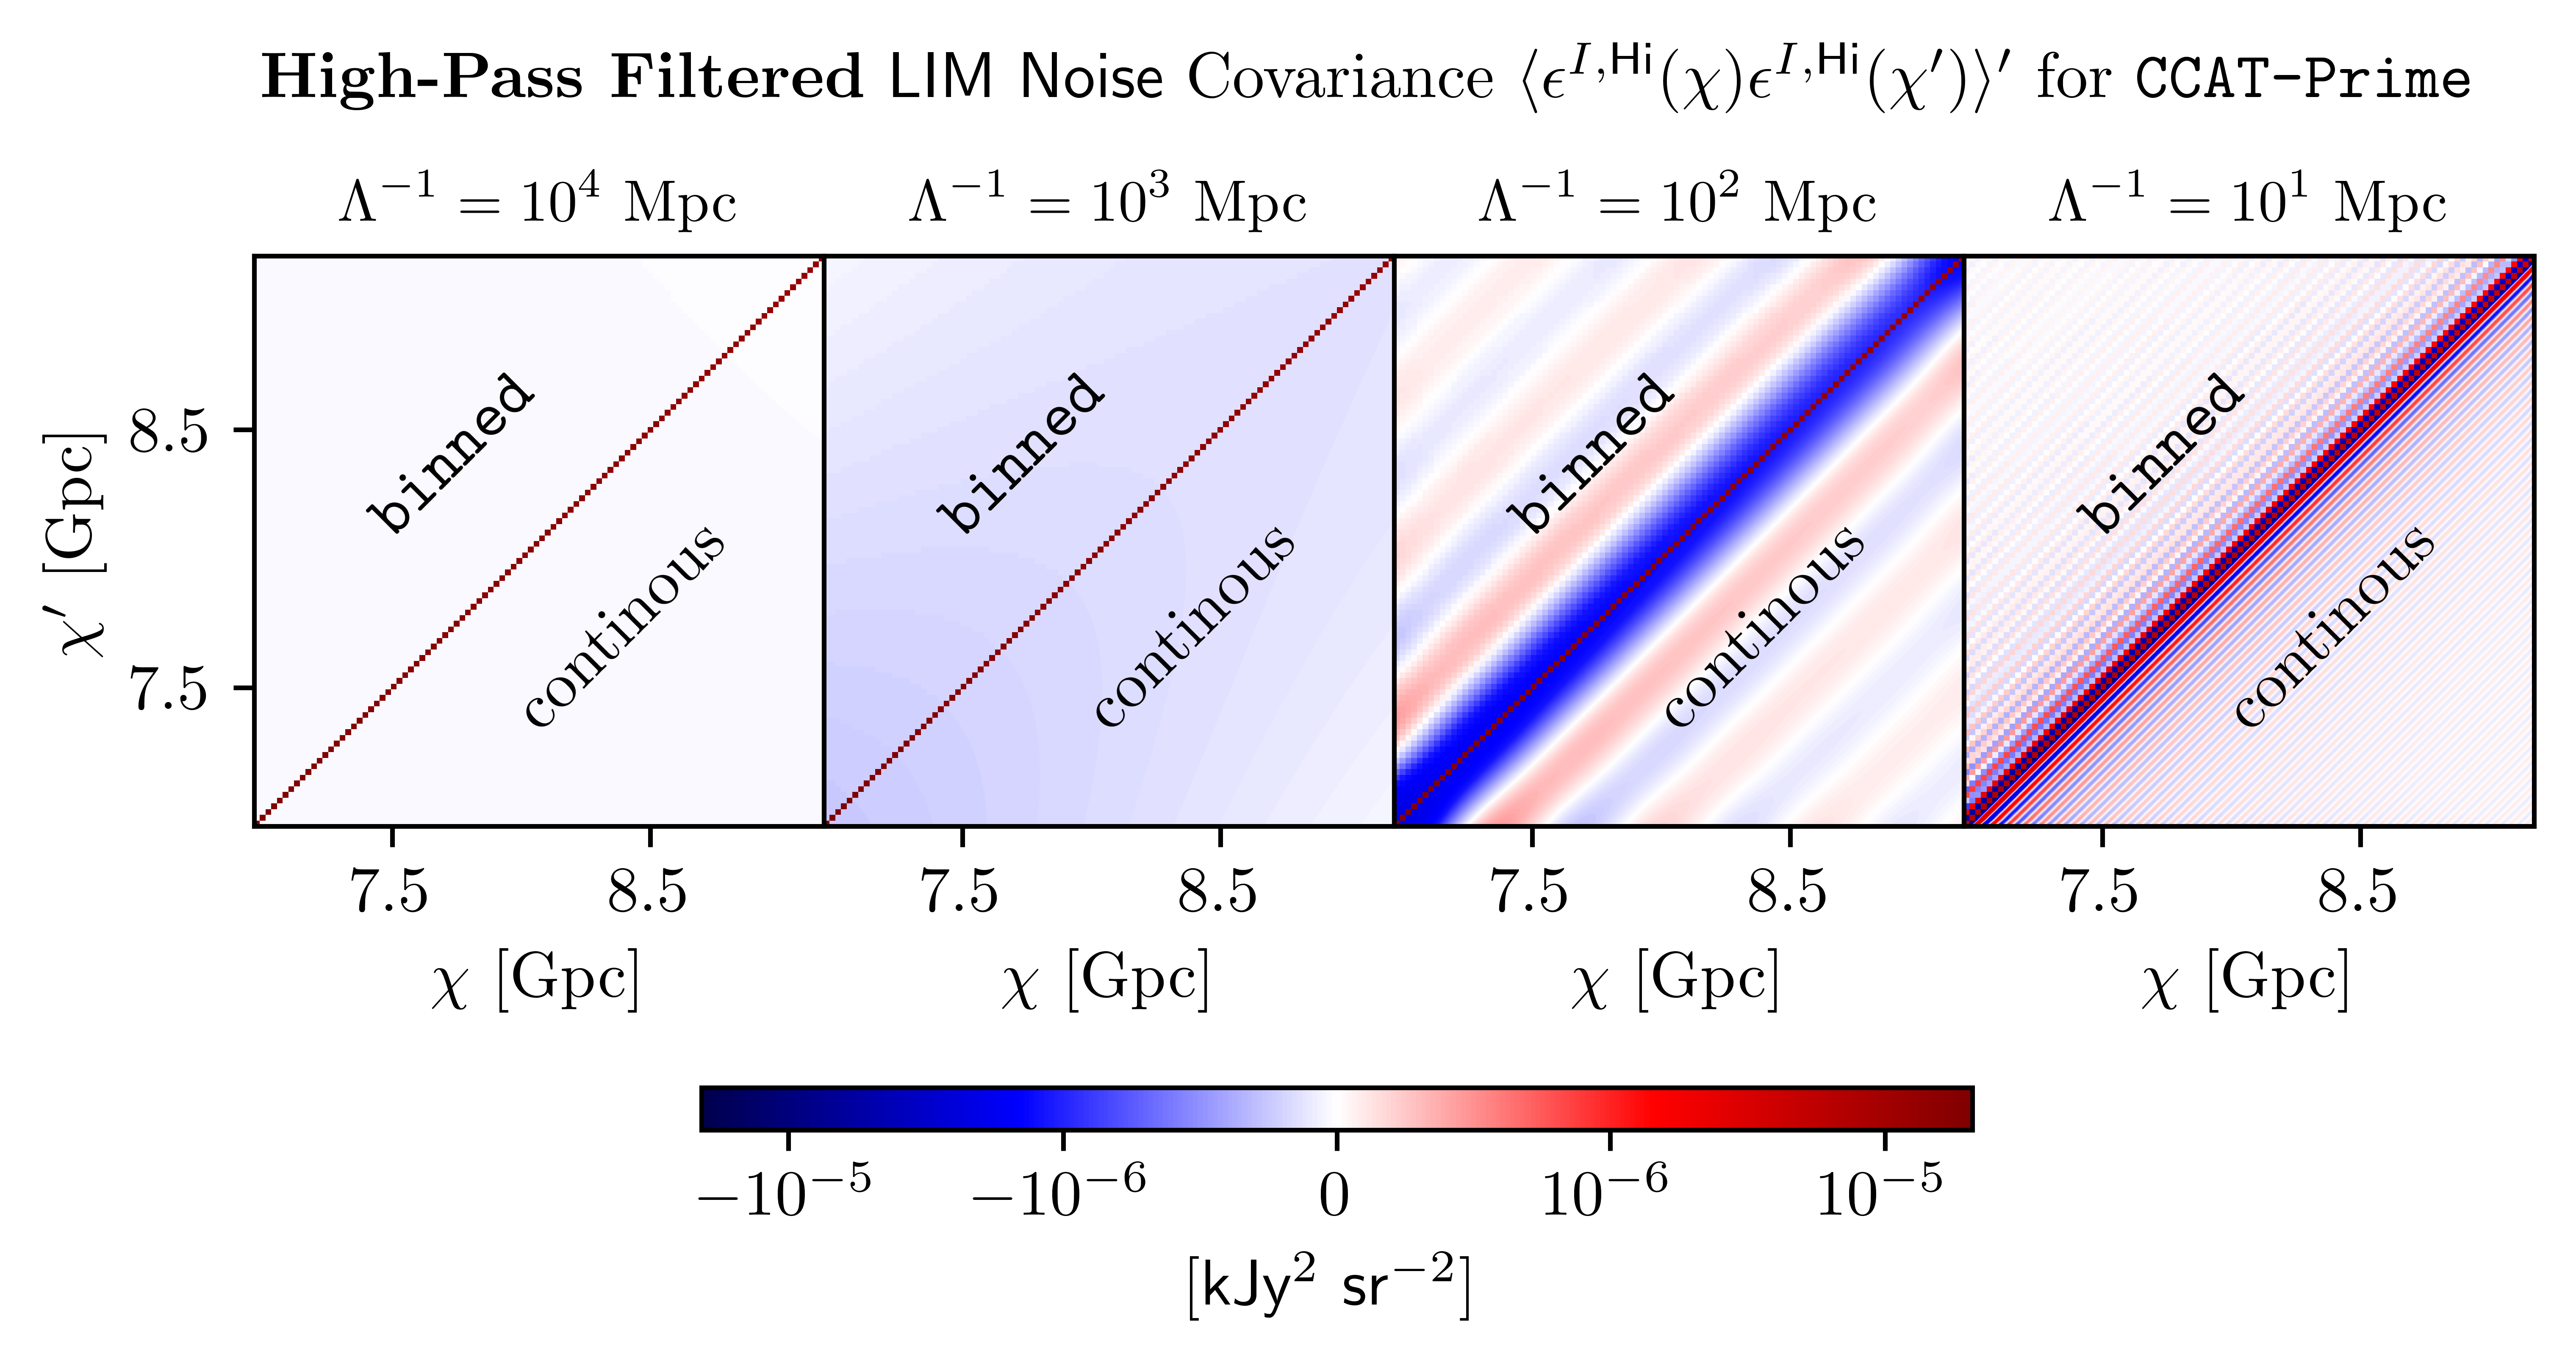

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=4,figsize = (6, 2), facecolor = 'w', dpi = 1000)
# axs = [ax1, ax2, ax3, ax4, ax5]
plt.tight_layout(pad = 0.5)
plt.subplots_adjust(wspace =0)

for ax, Lambda_idx in zip(axs, [6,12,18,24]):
    Lambda = Lambdas[Lambda_idx]
    oup_fname = '/scratch/users/delon/LIMxCMBL/eHIeHI/mpmath_comb_zmin_%.5f_zmax_%.5f_Lambda_idx_%.d_from_quad_nbins_%d.npy'%(zmin, zmax, Lambda_idx, nbins)
    ax.set_xticks([])
    ax.set_yticks([])
    cont_cov = continous_covs[Lambda_idx] 
    cont_cov = cont_cov * np.tri(*cont_cov.shape).T
    cont_cov[np.where(cont_cov ==0)] = None
    cont_cov *= Pei
    ax.imshow(cont_cov,
              cmap='seismic', norm = norm,
             extent = [chimin/1000, chimax/1000, chimin/1000, chimax/1000],
             origin = 'lower', interpolation='none')
    
    
    cov = np.load(oup_fname)
    cov = cov * np.tri(*cov.shape)
    cov[np.where(cov == 0)] = None
    cov *= Pei
    im = ax.imshow(cov,
              cmap='seismic', norm = norm,
             extent = [chimin/1000, chimax/1000, chimin/1000, chimax/1000],
                  origin = 'lower', interpolation='none')
    ax.set_title(r'$$\Lambda^{-1} = 10^{%d}\ {\rm Mpc}$$'%(-np.log10(Lambda)),fontsize=10)
    ax.set_xlabel(r"$\chi$ [{\rm Gpc}]",fontsize=11)
    ax.set_xticks([7.5, 8.5])

    offset = .15
    ax.text(0.5 - offset, 0.5 + offset, 
        r'\texttt{binned}',
            transform=ax.transAxes,
        ha='center', va='center', fontsize=11, rotation=45,)
    
    ax.text(0.5 + offset, 0.5 - offset, 
        r'\textrm{continous}',
            transform=ax.transAxes,
        ha='center', va='center', fontsize=11, rotation=45,)
    
cbar_ax = fig.add_axes([.25, -.15, 0.5, 0.05])  # [left, bottom, width, height]

axs[0].set_ylabel(r"$\chi'$ [{\rm Gpc}]",fontsize=11)
axs[0].set_yticks([7.5, 8.5])


cbar = fig.colorbar(im, cax=cbar_ax,
                   orientation='horizontal',
                   label=r'[\textsf{kJy${}^2$ sr}${}^{-2}$]')


fig.text(plt_cntr, 1.05, r"\textbf{High-Pass Filtered} \textsf{LIM Noise} Covariance $\langle \epsilon^{I,{\sf Hi}}(\chi)\epsilon^{I,{\sf Hi}}(\chi')\rangle'$ for \texttt{CCAT-Prime}",
         ha='center', 
         va='bottom', 
        fontsize=11)

plt.savefig('figures/009.005.eHIeHI.pdf', bbox_inches='tight')